## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted=="1"')['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.shape[0]-df.query('group=="treatment" & landing_page=="new_page" or group=="control" and landing_page=="old_page"')['user_id'].nunique()

3894

f. Do any of the rows have missing values?

In [7]:
df.info() #NO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.query('(group=="treatment"&landing_page=="new_page") or (group=="control"&landing_page=="old_page")')

In [9]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)==True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#User_id = 773192, timestamp different for the two users, group=treatment, landing_page=new_page, converted=0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.query('timestamp!="2017-01-14 02:55:59.590927"')
# I use the specific timestamp of one of the user to delete him

In [15]:
df2[df2.duplicated(['user_id'], keep=False)==True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_conv=df2.query('group=="control"')['converted'].mean()
print(control_conv)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_conv=df2.query('group=="treatment"')['converted'].mean()
print(treatment_conv)

0.118808065515


In [19]:
obs_diff=treatment_conv-control_conv #pretty much the same
print(obs_diff)

-0.00157823898536


d. What is the probability that an individual received the new page?

In [20]:
df2['landing_page'].value_counts().new_page/df2['user_id'].nunique()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There is no evidence that the new_page lead to more conversions than the old one. There is 1% more pourcent chance than you convert if you're in the control group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null Hypothesis contains the equal and lead to the worst error (false positive) so it will be Pold >= Pnew (H0)
and the alternative is Pold < Pnew (H1)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

Under the null P_new = P_old = 0.1196

In [21]:
P_new=df2.query('converted=="1"')['user_id'].count()/df2['user_id'].count()
print('conversion rate for P_new under H0 is : ',P_new)

conversion rate for P_new under H0 is :  0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
P_old=df2.query('converted=="1"')['user_id'].count()/df2['user_id'].count()
print('Conversion rate for P_old under H0 is : ', P_old)

Conversion rate for P_old under H0 is :  0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new=df2.query('group=="treatment"')['user_id'].count()
print('N_new (number of individuals in treatment group) is ',n_new)

N_new (number of individuals in treatment group) is  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old=df2.query('group=="control"')['user_id'].count()
print('N_old (number of individuals in control group) is ',n_old)

N_old (number of individuals in control group) is  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted=np.random.choice([0,1], n_new, [P_new, 1-P_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted=np.random.choice([0,1], n_old, [P_old, 1-P_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
print('P_new - P_old = ', new_page_converted.mean()-old_page_converted.mean())

P_new - P_old =  0.00285610806996


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
diffs=[]
for i in range(10000):
    new_page_converted=np.random.choice([0,1], n_new, [P_new, 1-P_new])
    old_page_converted=np.random.choice([0,1], n_old, [P_old, 1-P_old])
    diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [29]:
obs_diff=-0.00157823898536
obs_Diff=np.array(obs_diff).mean()

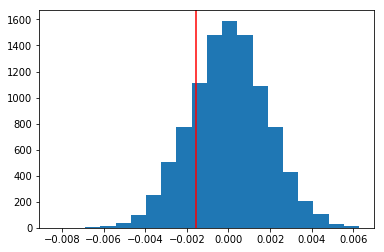

In [30]:
p_diffs=diffs
plt.hist(p_diffs, bins=20)
obs_diff=np.array(control_conv)
plt.axvline(x=obs_Diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
(p_diffs>obs_Diff).mean()

0.80379999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed the p-value the propability to obtain our value or a much extrem one. If our p-value < alpha (wich is 0.005 here) we can accept the null hypothesis but if p_value > alpha we will go for the alternative wich is P_old < P_new.**

**To concule 0.8054 >> 0.05 so we fail to reject the null hypothesis (P_old>=P_new) here**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted=="1"')['converted'].sum()
convert_new = df2.query('landing_page=="new_page" and converted=="1"')['converted'].sum()
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]
prob=df2['converted'].mean()

print('Number of person from the control group converted: ', convert_old)
print('Number of person from the treatment group converted: ', convert_new)
print('Number of person from the old_page : ', n_old)
print('Number of person from the new_page : ', n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Number of person from the control group converted:  17489
Number of person from the treatment group converted:  17264
Number of person from the old_page :  145274
Number of person from the new_page :  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value=proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger') #I guess value = 0 in this case
print('z_score : ', z_score)
print('p_value : ', p_value)

z_score :  -1.31092419842
p_value :  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-test found p_value = 0.19 > alpha so we fail to reject the null hypothesis (P_old>P_new), It is the same result than before: we found 0.20 for the p-value.
The Z-score indicate how many standard deviations an element is from the meann here z-score = 1.3 . It is below 1.5 so the convertion rate for the new_page is less than 95% of the convertion rate of the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should do Logistic regression because we want to predict if someone is going to be converted.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept']=1

In [35]:
df2[['control', 'ab_page']]=pd.get_dummies(df['group'])
df2=df2.drop(['control'], axis=1)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
lm=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 

#I needed to find the solution on the web. When I want to run a summary for a logit model an error occurs because
#somethin was missing...

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:46:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>

**Null hypothesis (in this case) : P_old = P_new.  Here the P-value of 0.19 > alpha =0.05 indicate us that we fail to reject the null hypothesis. We can't say that the new page is better than the old one.
This P-value is different from the one I calculated previously (wich was 0.8054) but the (Ho) was P_old >= P_new**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [38]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


**For ou regression model we can add the timestamp to have better predictions. We don't have others factors in this dataset to help us.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
df3=pd.merge(df2, df_countries, on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [41]:
df3[['CA', 'UK', 'US']]=pd.get_dummies(df3['country'])
df3=df3.drop(['CA'], axis=1) #we need to drop one : CA here

In [42]:
lm=sm.Logit(df3['converted'], df3[['intercept', 'ab_page','UK', 'US']])
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        18:46:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
lm=sm.Logit(df3['ab_page'], df3[['intercept','UK','US']])
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.760413
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:                 -0.1223
Time:                        18:46:04   Log-Likelihood:            -2.2096e+05
converged:                       True   LL-Null:                   -1.9688e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0142      0.017      0.855      0.392      -0.018       0.047
UK            -0.0212      0.018     -1.166      0.244      -0.057       0.014
US            -0.0124      0.017     -0.720      0.472      -0.046       0.021
==============================================================================
"""

There is a correlation in this case, UK's and US's citizens are less willing to be converted (coeff= -0.02 & -0.01) than the CA's citizens (coeff=0 here because we droped it).
The p-value >> alpha indicate that we can accept the H0 wich is no correlation in this case.

<a id='conclusions'></a>
## Conclusion

> The data were perfect without any missing values. We dropped the part of the data that was not relevant and we worked with the relevant one (df2).

> We established an A/B test with (Ho): P_old >= P_new and under the null hypothesis we failed to reject It with an alpha of 5% (most common value).

> In a second time we did z-test: we compute the z-score and the p_value. We found a p_value close the one before and agin we didn't reject the (Ho) because It was superior to alpha factor.

> In a third time we decided to run an A/B test with a logistic regression model to compare the new page to the old one. We use the (Ho):  P_new = P_old for this one and didn't reject the (Ho) according to the p_value.

> In the fourth part we brought more factors to predict if a personn will be converted or not to the page: the outry data. We created a Logit model and found that coutnries had a little impact on the conversion of someone.
> But for the last computation we were interrested by the provenance of the new page converted peoples and found that those ones were more willing to be from CA.

>In a general conclusion, according to the results of the A/B test we should not switch to the new page but we are more informed on the coutries that are more willing to switch to a new page and maybe we could propose It a personnal page.

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0